# Sales Prediction using Python:

## Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset:

In [90]:
adv=pd.read_csv(r'advertising.csv')
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Basic Info:

In [3]:
# checking the size of the data:

adv.shape

(200, 4)

In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# There are no non-numeric columns in the data.

In [6]:
adv.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# no null or missing values present in the data.

## EDA and Preprocessing:

In [8]:
adv.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


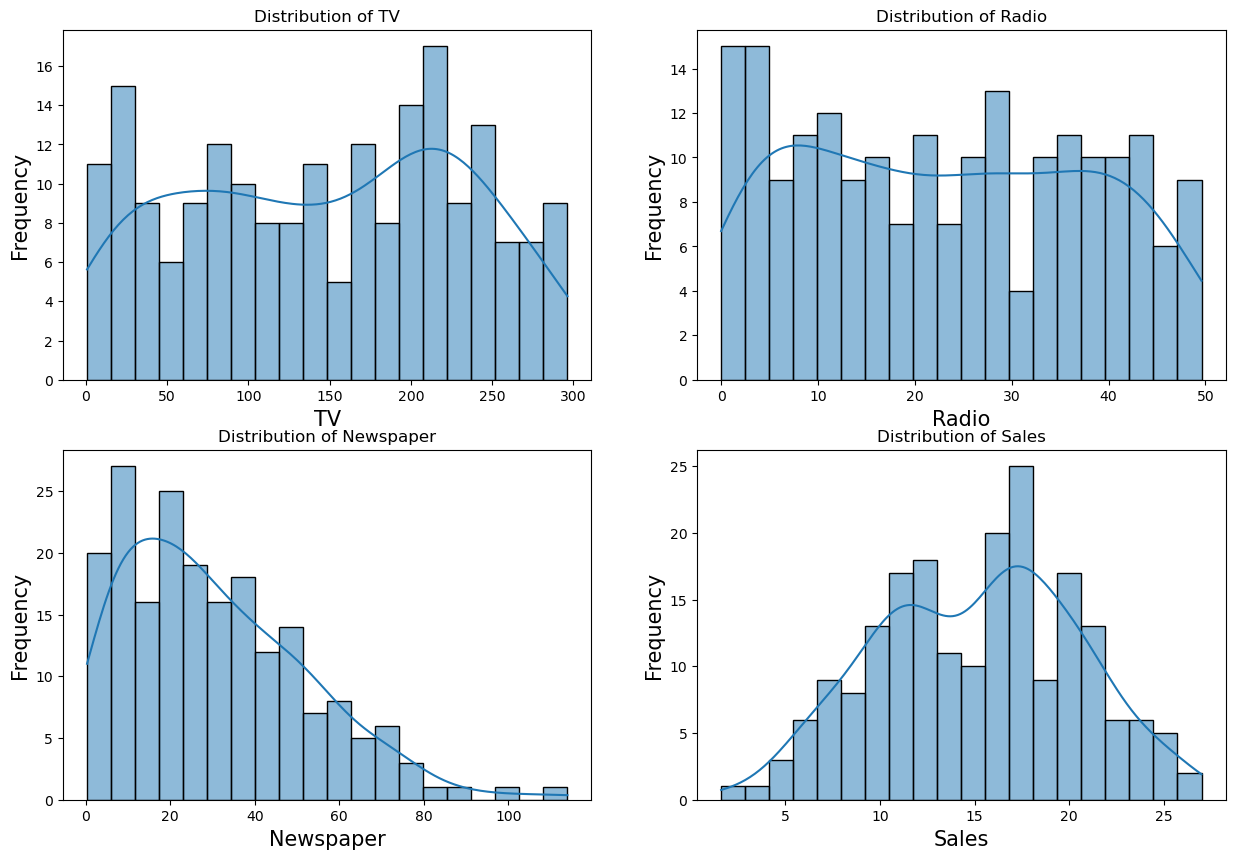

In [9]:
# checking the distribution of the data:

plt.figure(figsize =(15,10))
plotnumber=1

for i in adv: 
    plt.subplot(2,2,plotnumber)
    ax=sns.histplot(data=adv,x=i,bins=20,kde=True)
    plt.xlabel(i,fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title('Distribution of '+i)
    plotnumber+=1 
plt.show()

## Checking for Outliers:

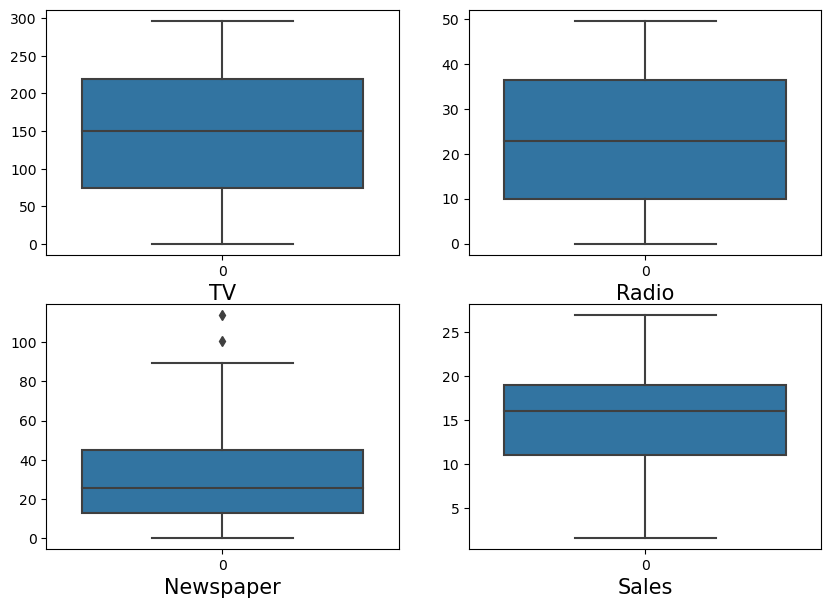

In [11]:
plt.figure(figsize =(10,7))
plotnumber = 1

for i in adv: 
    plt.subplot(2,2,plotnumber)
    ax=sns.boxplot(data=adv[i])
    plt.xlabel(i,fontsize = 15)
    
    plotnumber+=1 
plt.show()

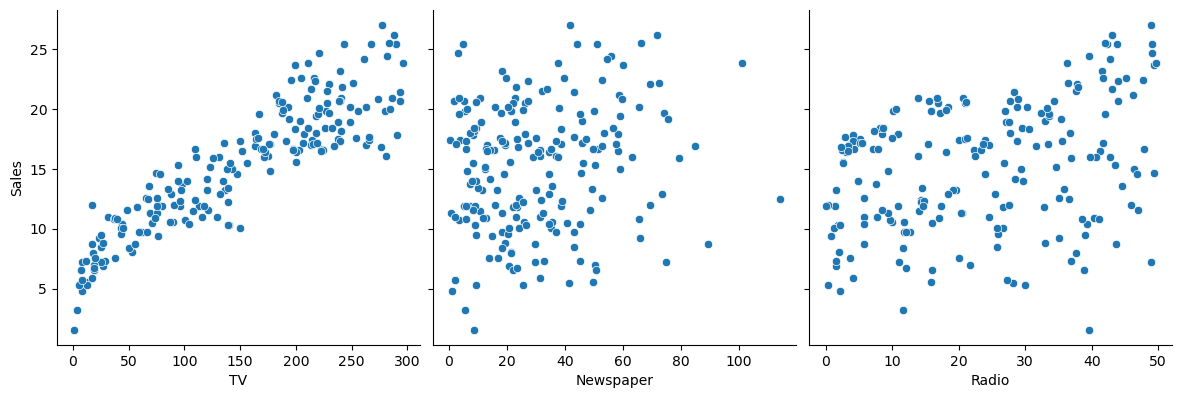

In [12]:
# Let's see how Sales are related with the features using scatter plot:

sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

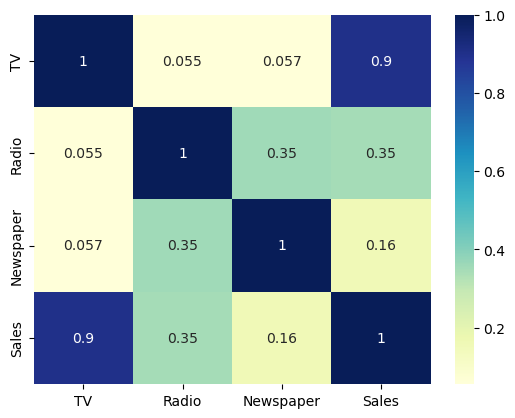

In [13]:
# Checking for Correlation:

sns.heatmap(adv.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
# Correlation of the features with the target Columns:

adv.corr()['Sales'].sort_values()

Newspaper    0.157960
Radio        0.349631
TV           0.901208
Sales        1.000000
Name: Sales, dtype: float64

* We can see that TV is highly correlated with the Sales, so let's build our model using TV feature for now.

## Model Building:

In [19]:
# Importing ML libraries:

import warnings
warnings.filterwarnings('ignore') # Supressing Warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mape

In [17]:
# firstly we will seperate the feature and target:

feature=adv.TV
target=adv.Sales

In [20]:
feature.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [21]:
target.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [30]:
# now splitting the data set into training data and validation data in a 80,20 ratio:

train_feature,val_feature,train_target,val_target=train_test_split(feature,target,train_size=0.8,random_state=5)

In [31]:
train_feature.shape,val_feature.shape

((160,), (40,))

In [32]:
train_target.shape,val_target.shape

((160,), (40,))

In [ ]:
# now the dataset has been successfully splitted into training and validation.
# Let's use the linear regression model and fit it into the data

In [ ]:
# Equation of linear regression:

# y=c+m1*x1+m2*x2+...+mn*xn
 
# y is the target, c is the intercept
# m1 is the coefficient for the first feature (x1)
# mn is the coefficient for the nth feature (xn)

In our case:

# y=c+m1×TV
 
# The m1 will be the model coefficient of TV.

In [27]:
line_reg=LinearRegression()
line_reg

LinearRegression()

In [37]:
# In order to fit, the value of the features must be a 2-D array
# In our case we have only a single feature so the value is coming to be in 1-D
# So before fitting we have to reshape the data

train_feature=train_feature.values.reshape(-1,1)
val_feature=val_feature.values.reshape(-1,1)

In [40]:
# fitting the model in the data:

line_reg.fit(train_feature,train_target)

LinearRegression()

* Fitting successful

In [42]:
# let's check for the co-efficient of the TV:

line_reg.coef_

array([0.05627869])

In [43]:
# intercept:

line_reg.intercept_

6.904021336853656

## Prediction:

In [45]:
# Let's predict for the train data and validation data:

train_pred=line_reg.predict(train_feature)
train_pred

array([14.31592529, 20.37151272,  7.91140995, 16.75842059, 19.75244709,
        9.4084232 , 17.50692722, 19.69054053, 16.61209599,  7.34299515,
       13.83192852, 11.99161524, 18.54808305, 18.0246912 , 11.30501518,
       11.95222016,  8.00708373, 22.67331129, 21.60964398, 11.13055123,
        9.71795602, 10.06688392, 18.76194209, 18.44115353,  8.24345425,
       18.91389456, 14.85620075, 20.88364884, 15.19387291, 14.56917941,
        8.67680019,  9.32400516, 12.68384317,  8.34475589, 23.58502613,
       13.0834219 , 17.90087807, 16.48265499, 10.62404299, 18.0246912 ,
       19.96630613, 16.38135335, 21.92480467, 16.09433201, 17.07920915,
       23.20795888, 13.13407272, 10.75348398, 19.02645195, 11.15306271,
       20.39965207, 20.50658159,  7.87201487, 22.47633587, 12.39119397,
       22.70145064,  6.94341642,  8.41229033, 10.66906594, 19.19528803,
       23.26423758, 18.10910924, 13.4323498 , 19.15589294, 17.30995179,
       11.87342999, 10.87729711, 14.79992205,  9.91493145, 11.41

In [46]:
val_pred=line_reg.predict(val_feature)

## Accuracy:

In [ ]:
# Accuracy on training data:
# We will use both line_reg.score and r2 function

In [ ]:
train_target=train_target.values.reshape(-1,1)
train_pred=train_pred.values.reshape(-1,1)

In [59]:
line_reg.score(train_feature,train_target)*100

81.60588254512798

In [56]:
r2=r2(train_target,train_pred)

In [58]:
r2*100

81.60588254512798

In [61]:
# Accuracy on validation data:

line_reg.score(val_feature,val_target)*100

78.79924840593134

* There is no huge difference between the accuracy of training and validation data

In [63]:
# Let's check the mean absolute percentage error:

train_mape=mape(train_target,train_pred)
train_mape*100

15.304626976541297

In [64]:
val_mape=mape(val_target,val_pred)
val_mape*100

12.887639817778146

* No significant difference in the mape between training and validation data

## Let's Visualize the best fit line for the train and validation data:

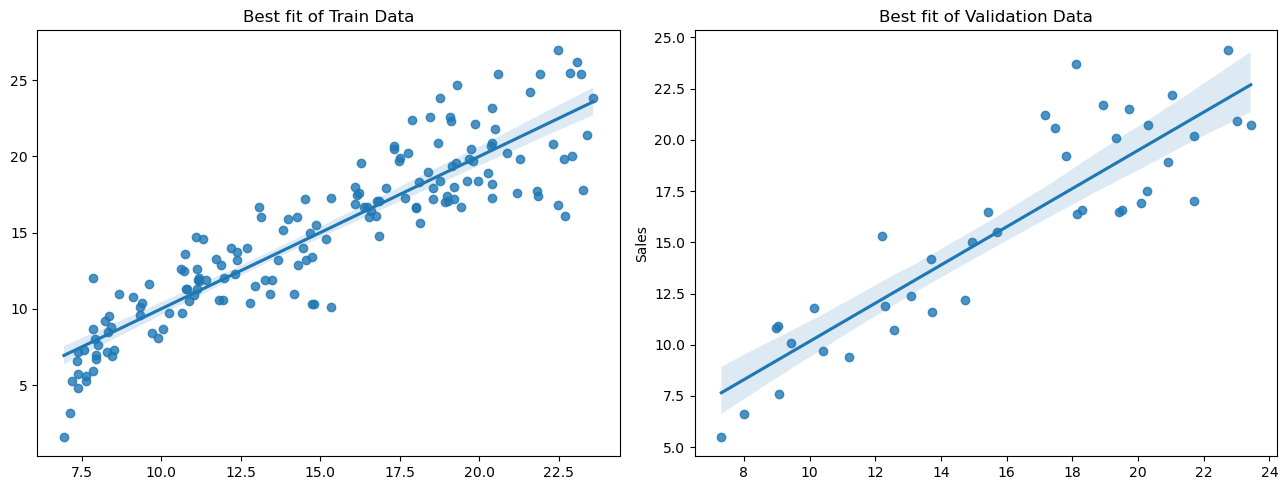

In [72]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(train_pred,train_target)
plt.title('Best fit of Train Data')

plt.subplot(1,2,2)
sns.regplot(val_pred,val_target)
plt.title('Best fit of Validation Data')

plt.tight_layout()
plt.show()

## # Let's Predict Sales using all the features in the data:

In [100]:
# Let's Predict Sales using all thefeatures in the data:

features=adv[['TV','Radio','Newspaper']]
features.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [101]:
target=adv.Sales
target

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [109]:
# splitting the data into train and validation:

train_features,val_features,train_target,val_target=train_test_split(features,target,train_size=0.8,random_state=10)

In [110]:
train_features

,TV,Radio,Newspaper
190,39.5,41.1,5.8
7,120.2,19.6,11.6
26,142.9,29.3,12.6
138,43.0,25.9,20.5
58,210.8,49.6,37.7
...,...,...,...
113,209.6,20.6,10.7
64,131.1,42.8,28.9
15,195.4,47.7,52.9
125,87.2,11.8,25.9


In [104]:
train_target

190    10.8
7      13.2
26     15.0
138     9.6
58     23.8
       ... 
113    20.9
64     16.0
15     22.4
125    10.6
9      15.6
Name: Sales, Length: 160, dtype: float64

In [111]:
# fitting the model in the data:

line_reg.fit(train_feature,train_target)

LinearRegression()

In [112]:
# predicting the target:

train_pred=line_reg.predict(train_features)
val_pred=line_reg.predict(val_features)

## Prediction Summary:

In [113]:
# Coefficient:

dict(zip(train_features.columns,line_reg.coef_))

{'TV': 0.05352432223021435,
 'Radio': 0.1089175888055452,
 'Newspaper': -0.0013697403326592694}

In [115]:
# Intercept:

line_reg.intercept_

4.79312364494618

In [128]:
print('train_score- ',line_reg.score(train_features,train_target)*100)
print('train_mape- ',mape(train_target,train_pred)*100)

print('\n')

print('validation_score- ',line_reg.score(val_features,val_target)*100)
print('validation_mape- ',mape(val_target,val_pred)*100) 

    



train_score-  90.70810657346003
train_mape-  8.754253826220596


validation_score-  88.86717577059423
validation_mape-  22.34566331809617


## Let's Visualize the best fit line for the train and validation data:

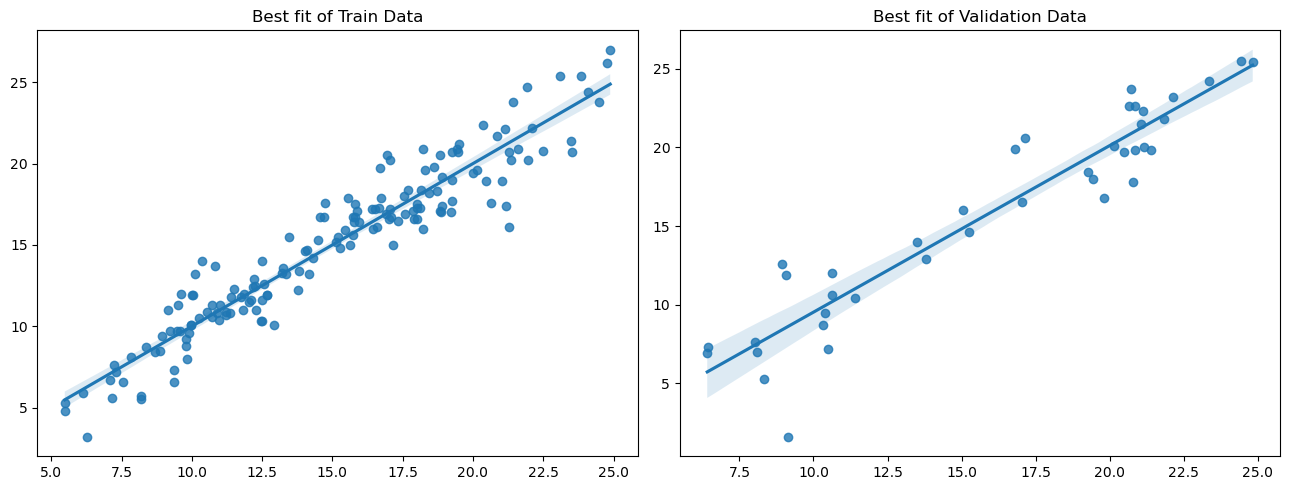

In [125]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(train_pred,train_target)
plt.title('Best fit of Train Data')

plt.subplot(1,2,2)
sns.regplot(val_pred,val_target)
plt.title('Best fit of Validation Data')

plt.tight_layout()
plt.show()

## Let's Split the data into70,30 Ratio:

In [136]:
# splitting the data into train and validation:

train_features,val_features,train_target,val_target=train_test_split(features,target,train_size=0.7,random_state=5)

In [137]:
# fitting the model in the data:

line_reg.fit(train_features,train_target)

LinearRegression()

In [138]:
# predicting the target:

train_pred=line_reg.predict(train_features)
val_pred=line_reg.predict(val_features)

## Prediction Summary:

In [139]:
# Coefficient:

dict(zip(train_features.columns,line_reg.coef_))

{'TV': 0.054413611141746726,
 'Radio': 0.1090970043624523,
 'Newspaper': -0.0013875966328157352}

In [140]:
# Intercept:

line_reg.intercept_

4.638305713181616

In [141]:
print('train_score- ',line_reg.score(train_features,train_target)*100)
print('train_mape- ',mape(train_target,train_pred)*100)

print('\n')

print('validation_score- ',line_reg.score(val_features,val_target)*100)
print('validation_mape- ',mape(val_target,val_pred)*100) 



train_score-  89.51369342813062
train_mape-  12.975804790731557


validation_score-  92.27214073019624
validation_mape-  7.485308728221117


## Let's Visualize the best fit line for the train and validation data:

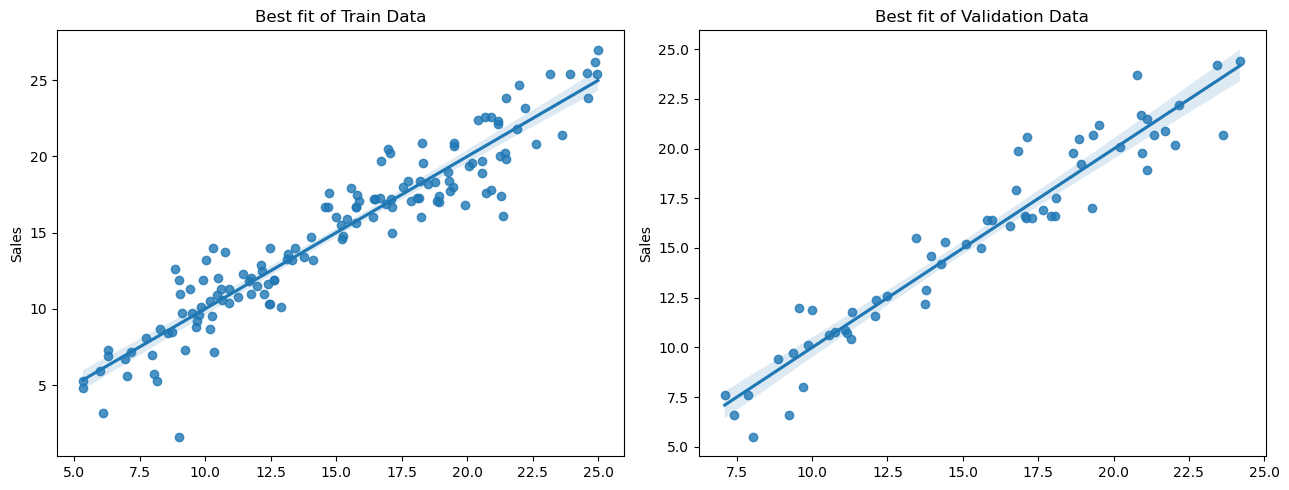

In [142]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(train_pred,train_target)
plt.title('Best fit of Train Data')

plt.subplot(1,2,2)
sns.regplot(val_pred,val_target)
plt.title('Best fit of Validation Data')

plt.tight_layout()
plt.show()

## Findings:

In [ ]:
# train_score-  81.6
# train_mape-  15.3         #mape refers to mean absolute percentage error

# validation_score-  78.8
# validation_mape-  12.88  

# conditions:
# splitted the data into 80,20 ratio
# Model- Linear Regression(), Feature-TV, Target-Sales
# No outliers removed, no null values imputed, no encoding performed

--------------------------------------------------------------------------------

# train_score-  90.70810657346003
# train_mape-  8.754253826220596

# validation_score-  88.86717577059423
# validation_mape-  22.34566331809617

# conditions:
# splitted the data into 80,20 ratio
# Model- Linear Regression(), Features-[TV,Radio,Newspaper], Target-Sales
# No outliers removed, no null values imputed, no encoding performed

-----------------------------------------------------------------------------------------

# train_score-  89.51369342813062
# train_mape-  12.975804790731557

# validation_score-  92.27214073019624
# validation_mape-  7.485308728221117

# conditions:
# splitted the data into 70,30 ratio
# Model- Linear Regression(), Features-[TV,Radio,Newspaper], Target-Sales
# No outliers removed, no null values imputed, no encoding performed